# Extraction of Events test

In [2]:
from birdset.datamodule.birdset_datamodule import BirdSetDataModule
from birdset.configs.datamodule_configs import DatasetConfig
import datasets

datamodule = BirdSetDataModule(
    dataset= DatasetConfig(
        data_dir='/home/rantjuschin/data_birdset/HSN',
        hf_path='DBD-research-group/BirdSet',
        hf_name='HSN',
        classlimit=None,
        eventlimit=None,
        task="multilabel",
        n_workers=3,
    ),
)

datamodule.prepare_data()

dataset = datasets.load_from_disk(datamodule.disk_save_path)
dataset

/home/rantjuschin/miniconda3/envs/torch-tf/lib/python3.10/site-packages/datasets/load.py:1461: FutureWarning: The repository for DBD-research-group/BirdSet contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/DBD-research-group/BirdSet
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this dataset from the next major release of `datasets`.
  warnings.warn(


Extracting train split:   0%|          | 0/7 [00:00<?, ?it/s]

Extracting test split:   0%|          | 0/3 [00:00<?, ?it/s]

Extracting test_5s split:   0%|          | 0/1 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

Generating test split: 0 examples [00:00, ? examples/s]

Setting num_proc from 3 back to 1 for the test_5s split to disable multiprocessing as it only contains one shard.


Generating test_5s split: 0 examples [00:00, ? examples/s]

Train event mapping (num_proc=3):   0%|          | 0/5460 [00:00<?, ? examples/s]

One-hot-encoding train labels. (num_proc=3):   0%|          | 0/38170 [00:00<?, ? examples/s]

/home/rantjuschin/miniconda3/envs/torch-tf/lib/python3.10/site-packages/datasets/load.py:1461: FutureWarning: The repository for DBD-research-group/BirdSet contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/DBD-research-group/BirdSet
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this dataset from the next major release of `datasets`.
  warnings.warn(
/home/rantjuschin/miniconda3/envs/torch-tf/lib/python3.10/site-packages/datasets/load.py:1461: FutureWarning: The repository for DBD-research-group/BirdSet contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/DBD-research-group/BirdSet
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandato

One-hot-encoding test_5s labels. (num_proc=3):   0%|          | 0/12000 [00:00<?, ? examples/s]

/home/rantjuschin/miniconda3/envs/torch-tf/lib/python3.10/site-packages/datasets/load.py:1461: FutureWarning: The repository for DBD-research-group/BirdSet contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/DBD-research-group/BirdSet
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this dataset from the next major release of `datasets`.
  warnings.warn(
/home/rantjuschin/miniconda3/envs/torch-tf/lib/python3.10/site-packages/datasets/load.py:1461: FutureWarning: The repository for DBD-research-group/BirdSet contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/DBD-research-group/BirdSet
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandato

Saving the dataset (0/1 shards):   0%|          | 0/30536 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/7634 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/12000 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['filepath', 'labels', 'detected_events', 'start_time', 'end_time'],
        num_rows: 30536
    })
    valid: Dataset({
        features: ['filepath', 'labels', 'detected_events', 'start_time', 'end_time'],
        num_rows: 7634
    })
    test: Dataset({
        features: ['filepath', 'labels', 'detected_events', 'start_time', 'end_time'],
        num_rows: 12000
    })
})

## Check performance with custom mapping

In [2]:
from birdset.datamodule.components.event_mapping import XCEventMapping
from datasets import load_dataset, Audio


ds = load_dataset("DBD-research-group/BirdSet", "HSN", cache_dir="/home/rantjuschin/data_birdset/HSN", num_proc=4)
print(ds)
print(ds["train"][0])


ds["train"] = ds["train"].cast_column(
    column="audio",
    feature=Audio(
        sampling_rate=32_000,
        mono=True,
        decode=False,
    ),
)
ds["test"] = ds["test"].cast_column(
    column="audio",
    feature=Audio(
        sampling_rate=32_000,
        mono=True,
        decode=False,
    ),
)
print(ds)
print(ds["train"][0])
mapper = XCEventMapping()

ds["train"] = ds["train"].map(
    mapper,
    remove_columns=["audio"],
    batched=True,
    batch_size=300,
    num_proc=3,
    desc="Train event mapping"
)

print(ds)
print(ds["train"][0])

DatasetDict({
    train: Dataset({
        features: ['audio', 'filepath', 'start_time', 'end_time', 'low_freq', 'high_freq', 'ebird_code', 'ebird_code_multilabel', 'ebird_code_secondary', 'call_type', 'sex', 'lat', 'long', 'length', 'microphone', 'license', 'source', 'local_time', 'detected_events', 'event_cluster', 'peaks', 'quality', 'recordist', 'genus', 'species_group', 'order', 'genus_multilabel', 'species_group_multilabel', 'order_multilabel'],
        num_rows: 5460
    })
    test: Dataset({
        features: ['audio', 'filepath', 'start_time', 'end_time', 'low_freq', 'high_freq', 'ebird_code', 'ebird_code_multilabel', 'ebird_code_secondary', 'call_type', 'sex', 'lat', 'long', 'length', 'microphone', 'license', 'source', 'local_time', 'detected_events', 'event_cluster', 'peaks', 'quality', 'recordist', 'genus', 'species_group', 'order', 'genus_multilabel', 'species_group_multilabel', 'order_multilabel'],
        num_rows: 10296
    })
    test_5s: Dataset({
        features: [

In [14]:
seen_files = set()
events_per_file = {}

for sample in ds:
    path = sample["filepath"]
    if path not in events_per_file.keys():
        events_per_file[path] = 0
    events_per_file[path] += 1

events_per_file

{'/home/rantjuschin/data_birdset/HSN/downloads/extracted/70fda45ec1af208cea5e5c58da3884bb439e0ca32f029bb39d42cfd4bde384bc/XC805337.ogg': 3,
 '/home/rantjuschin/data_birdset/HSN/downloads/extracted/70fda45ec1af208cea5e5c58da3884bb439e0ca32f029bb39d42cfd4bde384bc/XC803488.ogg': 1,
 '/home/rantjuschin/data_birdset/HSN/downloads/extracted/70fda45ec1af208cea5e5c58da3884bb439e0ca32f029bb39d42cfd4bde384bc/XC800462.ogg': 7,
 '/home/rantjuschin/data_birdset/HSN/downloads/extracted/70fda45ec1af208cea5e5c58da3884bb439e0ca32f029bb39d42cfd4bde384bc/XC799596.ogg': 4,
 '/home/rantjuschin/data_birdset/HSN/downloads/extracted/70fda45ec1af208cea5e5c58da3884bb439e0ca32f029bb39d42cfd4bde384bc/XC797069.ogg': 1,
 '/home/rantjuschin/data_birdset/HSN/downloads/extracted/70fda45ec1af208cea5e5c58da3884bb439e0ca32f029bb39d42cfd4bde384bc/XC794380.ogg': 1,
 '/home/rantjuschin/data_birdset/HSN/downloads/extracted/70fda45ec1af208cea5e5c58da3884bb439e0ca32f029bb39d42cfd4bde384bc/XC793285.ogg': 1,
 '/home/rantjuschin/

## Compare event counts

In [ ]:
seen_files = set()
events_per_file = {}

for sample in dataset["train"]:
    path = sample["filepath"]
    if path not in events_per_file.keys():
        events_per_file[path] = 0
    events_per_file[path] += 1

events_per_file

{'/home/rantjuschin/data_birdset/HSN/downloads/extracted/4c9ec77c9d946618598d99c46cb7c945d9651c30b995b22ee07df0fb982c944b/XC448793.ogg': 2,
 '/home/rantjuschin/data_birdset/HSN/downloads/extracted/008ae7d99dfc170f7034b039349886b7011d6c2f7c5ee0c74164685abeb5d11a/XC768321.ogg': 44,
 '/home/rantjuschin/data_birdset/HSN/downloads/extracted/3effc88fd4344719fc9777b280e918bd8e9b26227dfb80f137ff6e5f55001cc3/XC388424.ogg': 1,
 '/home/rantjuschin/data_birdset/HSN/downloads/extracted/7e426944e53b540cd625614b7528a3cc04108be7bdaa459a2c84141c209661b7/XC483708.ogg': 16,
 '/home/rantjuschin/data_birdset/HSN/downloads/extracted/bcc61f27e63809bb86f066d4b4fa59496880f42430a8bba4725916015044b3ca/XC461774.ogg': 31,
 '/home/rantjuschin/data_birdset/HSN/downloads/extracted/bcc61f27e63809bb86f066d4b4fa59496880f42430a8bba4725916015044b3ca/XC186427.ogg': 43,
 '/home/rantjuschin/data_birdset/HSN/downloads/extracted/008ae7d99dfc170f7034b039349886b7011d6c2f7c5ee0c74164685abeb5d11a/XC582235.ogg': 4,
 '/home/rantjusc

In [ ]:
from util.event_extraction import load_audio

print(dataset["train"][11])
print(dataset["test"][13])

audio_train, _ = load_audio(dataset["train"][11], min_len=5, max_len=5, sampling_rate=32000) # loads a 5 second clip around the detected event
audio_test, _ = load_audio(dataset["test"][13], min_len=5, max_len=5, sampling_rate=32000) # loads a 5 second test segment

print("test: ", audio_test, "train: ", audio_train)

{'filepath': '/home/rantjuschin/data_birdset/HSN/downloads/extracted/7e426944e53b540cd625614b7528a3cc04108be7bdaa459a2c84141c209661b7/XC535123.ogg', 'labels': array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), 'detected_events': array([42.464, 43.744], dtype=float32), 'start_time': nan, 'end_time': nan}
{'filepath': '/home/rantjuschin/data_birdset/HSN/downloads/extracted/91e0ce124db9d849e0f8a1676a627a87178935b468cf27b6f10728679d2ceb15/HSN_001_20150708_061805_065_070.ogg', 'labels': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), 'detected_events': None, 'start_time': 0.0, 'end_time': 5.0}
test:  [-0.00153784 -0.00117658 -0.00150365 ... -0.00166972 -0.0018063
 -0.00205878] train:  [-4.7800531e-05  2.8390110e-05  2.0737544e-04 ... -8.1799395e-04
 -8.4898033e-04 -8.5569359e-04]


files under 5 sec: 

idx, length, path  
70 (1.426, '/home/rantjuschin/data_birdset/HSN/downloads/extracted/3effc88fd4344719fc9777b280e918bd8e9b26227dfb80f137ff6e5f55001cc3/XC290280.ogg')  
112 (3.702875, '/home/rantjuschin/data_birdset/HSN/downloads/extracted/008ae7d99dfc170f7034b039349886b7011d6c2f7c5ee0c74164685abeb5d11a/XC678630.ogg')  
187 (3.91453125, '/home/rantjuschin/data_birdset/HSN/downloads/extracted/d7110eb85771b333e4939e54f73de24b5ffe9dd8e86c68263bb3efc2f730fc8f/XC859276.ogg')  
203 (2.32490625, '/home/rantjuschin/data_birdset/HSN/downloads/extracted/008ae7d99dfc170f7034b039349886b7011d6c2f7c5ee0c74164685abeb5d11a/XC389976.ogg')  
297 (4.6, '/home/rantjuschin/data_birdset/HSN/downloads/extracted/bcc61f27e63809bb86f066d4b4fa59496880f42430a8bba4725916015044b3ca/XC358683.ogg')  
304 (4.7233125, '/home/rantjuschin/data_birdset/HSN/downloads/extracted/008ae7d99dfc170f7034b039349886b7011d6c2f7c5ee0c74164685abeb5d11a/XC590177.ogg')  

{'filepath': '/home/rantjuschin/data_birdset/HSN/downloads/extracted/008ae7d99dfc170f7034b039349886b7011d6c2f7c5ee0c74164685abeb5d11a/XC678630.ogg', 'labels': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]), 'detected_events': array([1.456, 2.512], dtype=float32), 'start_time': nan, 'end_time': nan}
[ 2.2297013e-03  2.3945831e-03  2.1245438e-03 ... -7.7298400e-04
 -1.1889460e-03 -8.6328204e-05]
-2.9879773e-05


[-2.9879773e-05 -2.9879773e-05 -2.9879773e-05 ... -2.9879773e-05
 -2.9879773e-05 -2.9879773e-05]
-2.9879779e-05


[-2.9879773e-05 -2.9879773e-05 -2.9879773e-05 ... -2.9879773e-05
 -2.9879773e-05 -2.9879773e-05]
{'filepath': '/home/rantjuschin/data_birdset/HSN/downloads/extracted/008ae7d99dfc170f7034b039349886b7011d6c2f7c5ee0c74164685abeb5d11a/XC678630.ogg', 'labels': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]), 'detected_events': array([1.456, 2.512], dtype=float32), 'start_time': nan, 'end_time': nan}


NameError: name 'Audio' is not defined

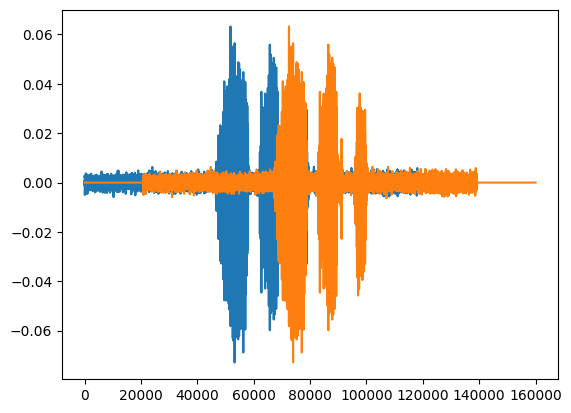

In [ ]:
import IPython.display
import datasets
import matplotlib.pyplot as plt
from util.event_extraction import load_audio

train_data = dataset["train"]
print(train_data[112])

# get and visualize audio shorter then 5 sec
audio, sr = load_audio(train_data[112], min_len=5, max_len=5, sampling_rate=32_000, pad_to_min_length=False)
print(audio)
print(audio.mean())

plt.plot(audio)
IPython.display.display(IPython.display.Audio(audio, rate=32000))

# get and visualize audio shorter then 5 sec
audio, sr = load_audio(train_data[112], min_len=5, max_len=5, sampling_rate=32_000, pad_to_min_length=True)
print(audio)
print(audio.mean())

plt.plot(audio)
IPython.display.display(IPython.display.Audio(audio, rate=32000))

# Index Dataset

In [3]:
from birdset.datamodule.birdset_datamodule import BirdSetDataModule
from birdset.configs.datamodule_configs import DatasetConfig
import datasets

datamodule = BirdSetDataModule(
    dataset= DatasetConfig(
        data_dir='/home/rantjuschin/data_birdset/HSN',
        hf_path='DBD-research-group/BirdSet',
        hf_name='HSN',
        classlimit=None,
        eventlimit=None,
        task="multilabel",
        n_workers=3,
    ),
)

datamodule.prepare_data()

dataset = datasets.load_from_disk(datamodule.disk_save_path)
dataset

DatasetDict({
    train: Dataset({
        features: ['filepath', 'labels', 'detected_events', 'start_time', 'end_time'],
        num_rows: 30536
    })
    valid: Dataset({
        features: ['filepath', 'labels', 'detected_events', 'start_time', 'end_time'],
        num_rows: 7634
    })
    test: Dataset({
        features: ['filepath', 'labels', 'detected_events', 'start_time', 'end_time'],
        num_rows: 12000
    })
})

In [9]:
indexed_dataset = dataset.map(lambda sample, idx: {"index": idx}, with_indices=True)
print(indexed_dataset)
print(indexed_dataset["train"][1])


DatasetDict({
    train: Dataset({
        features: ['filepath', 'labels', 'detected_events', 'start_time', 'end_time', 'index'],
        num_rows: 30536
    })
    valid: Dataset({
        features: ['filepath', 'labels', 'detected_events', 'start_time', 'end_time', 'index'],
        num_rows: 7634
    })
    test: Dataset({
        features: ['filepath', 'labels', 'detected_events', 'start_time', 'end_time', 'index'],
        num_rows: 12000
    })
})
{'filepath': '/home/rantjuschin/data_birdset/HSN/downloads/extracted/70fda45ec1af208cea5e5c58da3884bb439e0ca32f029bb39d42cfd4bde384bc/XC768321.ogg', 'labels': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]), 'detected_events': array([89.088, 89.616], dtype=float32), 'start_time': nan, 'end_time': nan, 'index': 1}


# Try to get Perch Embeddings

## Using custom decoding and padding

In [2]:
import tensorflow as tf
tf.config.list_physical_devices("GPU")

2024-11-21 22:19:21.934650: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-11-21 22:19:21.934689: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-11-21 22:19:21.934723: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-11-21 22:19:21.941976: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-11-21 22:19:22.714305: W tensorflow/compiler/

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [34]:
from birdset.datamodule.birdset_datamodule import BirdSetDataModule
from birdset.configs.datamodule_configs import DatasetConfig
import datasets

datamodule = BirdSetDataModule(
    dataset= DatasetConfig(
        data_dir='/home/rantjuschin/data_birdset/HSN',
        hf_path='DBD-research-group/BirdSet',
        hf_name='HSN',
        classlimit=None,
        eventlimit=None,
        task="multilabel",
        n_workers=3,
    ),
)

datamodule.prepare_data()

dataset = datasets.load_from_disk(datamodule.disk_save_path)

dataset

/home/rantjuschin/miniconda3/envs/torch-tf/lib/python3.10/site-packages/datasets/load.py:1461: FutureWarning: The repository for DBD-research-group/BirdSet contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/DBD-research-group/BirdSet
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this dataset from the next major release of `datasets`.
  warnings.warn(


One-hot-encoding train labels. (num_proc=3):   0%|          | 0/38170 [00:00<?, ? examples/s]

/home/rantjuschin/bachelor-project/src/birdset/birdset/datamodule/base_datamodule.py:478: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  class_one_hot_matrix = torch.tensor(class_one_hot_matrix, dtype=torch.float32)
/home/rantjuschin/bachelor-project/src/birdset/birdset/datamodule/base_datamodule.py:478: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  class_one_hot_matrix = torch.tensor(class_one_hot_matrix, dtype=torch.float32)
/home/rantjuschin/bachelor-project/src/birdset/birdset/datamodule/base_datamodule.py:478: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.te

One-hot-encoding test_5s labels. (num_proc=3):   0%|          | 0/12000 [00:00<?, ? examples/s]

/home/rantjuschin/bachelor-project/src/birdset/birdset/datamodule/base_datamodule.py:478: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  class_one_hot_matrix = torch.tensor(class_one_hot_matrix, dtype=torch.float32)
/home/rantjuschin/bachelor-project/src/birdset/birdset/datamodule/base_datamodule.py:478: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  class_one_hot_matrix = torch.tensor(class_one_hot_matrix, dtype=torch.float32)
/home/rantjuschin/bachelor-project/src/birdset/birdset/datamodule/base_datamodule.py:478: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.te

Saving the dataset (0/1 shards):   0%|          | 0/30536 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/7634 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/12000 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['filepath', 'labels', 'detected_events', 'start_time', 'end_time'],
        num_rows: 30536
    })
    valid: Dataset({
        features: ['filepath', 'labels', 'detected_events', 'start_time', 'end_time'],
        num_rows: 7634
    })
    test: Dataset({
        features: ['filepath', 'labels', 'detected_events', 'start_time', 'end_time'],
        num_rows: 12000
    })
})

In [35]:
from birdset.modules.models.perch import PerchModel

perch = PerchModel(
    num_classes=datamodule.num_classes,
    tfhub_version=""
)

2024-12-05 01:41:42.927173: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-12-05 01:41:42.930675: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-12-05 01:41:42.933355: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

In [7]:
audio, _ = load_audio(dataset["train"][0], min_len=5, max_len=5, sampling_rate=32000, pad_to_min_length=True)
perch.get_embeddings(audio)

(tensor([[ 0.0754,  0.0902,  0.0337,  ..., -0.0154,  0.3021, -0.0318]]),
 tensor([[-16.1106, -14.0662, -14.1079,  ..., -13.5415, -14.6869,  -9.9506]]))

In [6]:
from dataset_curation.util.event_extraction import load_audio

def get_embeddings(sample):
    audio, _ = load_audio(sample, min_len=5, max_len=5, sampling_rate=32000, pad_to_min_length=True)
    return perch.get_embeddings(audio)[0]

embeddings_set = dataset.map(lambda sample: {"audio": get_embeddings(sample)}, remove_columns=["filepath"])
print(embeddings_set)

ModuleNotFoundError: No module named 'dataset_curation'

In [10]:
embeddings_set.save_to_disk(dataset_dict_path="/home/rantjuschin/bachelor_projekt/datasets/HSN/perch_embeddings/")

Saving the dataset (0/1 shards):   0%|          | 0/30536 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/7634 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/12000 [00:00<?, ? examples/s]

## Use BirdSet to decode and pad

In [1]:
import tensorflow as tf
tf.config.list_physical_devices("GPU")

2025-01-16 18:12:59.904938: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-01-16 18:12:59.905032: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-01-16 18:12:59.911260: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-01-16 18:13:00.833943: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [3]:
from birdset.datamodule.birdset_datamodule import BirdSetDataModule
from birdset.configs.datamodule_configs import DatasetConfig
import datasets

dataset = datasets.load_from_disk("/mnt/stud/work/rantjuschin/datasets/indexed/HSN")

dataset

/mnt/stud/home/rantjuschin/miniconda3/envs/torch-tf/lib/python3.10/site-packages/torch_audiomentations/utils/io.py:27: UserWarning: torchaudio._backend.set_audio_backend has been deprecated. With dispatcher enabled, this function is no-op. You can remove the function call.
  torchaudio.set_audio_backend("soundfile")


DatasetDict({
    train: Dataset({
        features: ['filepath', 'start_time', 'end_time', 'low_freq', 'high_freq', 'ebird_code', 'ebird_code_multilabel', 'ebird_code_secondary', 'call_type', 'sex', 'lat', 'long', 'length', 'microphone', 'license', 'source', 'local_time', 'detected_events', 'event_cluster', 'peaks', 'quality', 'recordist', 'genus', 'species_group', 'order', 'genus_multilabel', 'species_group_multilabel', 'order_multilabel', 'index'],
        num_rows: 38170
    })
    test: Dataset({
        features: ['filepath', 'start_time', 'end_time', 'low_freq', 'high_freq', 'ebird_code', 'ebird_code_multilabel', 'ebird_code_secondary', 'call_type', 'sex', 'lat', 'long', 'length', 'microphone', 'license', 'source', 'local_time', 'detected_events', 'event_cluster', 'peaks', 'quality', 'recordist', 'genus', 'species_group', 'order', 'genus_multilabel', 'species_group_multilabel', 'order_multilabel', 'index'],
        num_rows: 10296
    })
    test_5s: Dataset({
        features: 

In [2]:
from birdset.modules.models.perch import PerchModel

perch = PerchModel(
    num_classes=21,
    tfhub_version=""
)

/mnt/stud/home/rantjuschin/miniconda3/envs/torch-tf/lib/python3.10/site-packages/huggingface_hub/file_download.py:797: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
2025-01-16 18:14:30.538999: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1886] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 15513 MB memory:  -> device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:3b:00.0, compute capability: 6.0


In [4]:
from birdset.datamodule.components.event_decoding import EventDecoding
from birdset.datamodule.components.feature_extraction import DefaultFeatureExtractor

decoder = EventDecoding(
    min_len=0,
    max_len=5,
    sampling_rate=32000,
    extension_time=5,
    extracted_interval=5
)

# calc mean
mean = 0

extractor = DefaultFeatureExtractor(
    feature_size=1,
    sampling_rate=32000,
    padding_value=mean,
    return_attention_mask=False
)

batch = {}
train_set = dataset["train"]
for key in train_set[0].keys():
    batch[key] = [train_set[0][key]]

decoded_batch = decoder(batch)
print(decoded_batch)
print(decoded_batch["audio"])

new_audio_attributes = []
for audio_attribute in decoded_batch["audio"]:
    new_audio_attributes.append(audio_attribute["array"])
decoded_batch["audio"] = new_audio_attributes
print(decoded_batch["audio"])


sample = extractor(decoded_batch["audio"], padding="max_length", max_length=5*32000, truncation=True, return_attention_mask=False)
print(sample)
print(sample["input_values"].shape)
print(perch.get_embeddings(sample["input_values"]))

{'filepath': ['/mnt/stud/work/rantjuschin/datasets/HSN/downloads/extracted/e8d87da059276237fe3a09f216dfe50ac2186afa53bf9c3b9e14c93979cbeba4/XC482284.ogg'], 'start_time': [None], 'end_time': [None], 'low_freq': [None], 'high_freq': [None], 'ebird_code': [20], 'ebird_code_multilabel': [[20]], 'ebird_code_secondary': [[]], 'call_type': ['drumming'], 'sex': [None], 'lat': [40.6917], 'long': [-118.2176], 'length': [66], 'microphone': ['focal'], 'license': ['//creativecommons.org/licenses/by-nc-sa/4.0/'], 'source': ['xenocanto'], 'local_time': ['10:26'], 'detected_events': [[1.744, 2.848]], 'event_cluster': [[0]], 'peaks': [[19.372165320181082]], 'quality': ['A'], 'recordist': ['Ed Pandolfino'], 'genus': [4], 'species_group': [12], 'order': [3], 'genus_multilabel': [[4]], 'species_group_multilabel': [[12]], 'order_multilabel': [[3]], 'index': [0], 'audio': [{'path': '/mnt/stud/work/rantjuschin/datasets/HSN/downloads/extracted/e8d87da059276237fe3a09f216dfe50ac2186afa53bf9c3b9e14c93979cbeba4/X

2025-01-16 18:26:36.931786: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x55832f6fc130 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2025-01-16 18:26:36.931952: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0
2025-01-16 18:26:37.637094: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2025-01-16 18:26:38.249122: W tensorflow/compiler/tf2xla/kernels/assert_op.cc:38] Ignoring Assert operator jax2tf_infer_fn_/assert_equal_1/Assert/AssertGuard/Assert
2025-01-16 18:26:38.780251: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:442] Loaded cuDNN version 8700
2025-01-16 18:26:38.907835: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2025-01-16 18:26:46.176057: I ./tensorflow/com

(tensor([[ 0.0754,  0.0902,  0.0337,  ..., -0.0154,  0.3021, -0.0318]]), tensor([[-16.1106, -14.0662, -14.1079,  ..., -13.5415, -14.6869,  -9.9506]]))


In [8]:
batch = {}
train_set = dataset["train"]
for key in train_set[0].keys():
    batch[key] = [train_set[0][key]]

decoded_batch = decoder(batch)
print(decoded_batch)
print(decoded_batch["audio"])

decoded_batch["audio"] = [audio_attribute["array"] for audio_attribute in decoded_batch["audio"]]
print(decoded_batch["audio"])

{'filepath': ['/mnt/stud/work/rantjuschin/datasets/HSN/downloads/extracted/e8d87da059276237fe3a09f216dfe50ac2186afa53bf9c3b9e14c93979cbeba4/XC482284.ogg'], 'start_time': [None], 'end_time': [None], 'low_freq': [None], 'high_freq': [None], 'ebird_code': [20], 'ebird_code_multilabel': [[20]], 'ebird_code_secondary': [[]], 'call_type': ['drumming'], 'sex': [None], 'lat': [40.6917], 'long': [-118.2176], 'length': [66], 'microphone': ['focal'], 'license': ['//creativecommons.org/licenses/by-nc-sa/4.0/'], 'source': ['xenocanto'], 'local_time': ['10:26'], 'detected_events': [[1.744, 2.848]], 'event_cluster': [[0]], 'peaks': [[19.372165320181082]], 'quality': ['A'], 'recordist': ['Ed Pandolfino'], 'genus': [4], 'species_group': [12], 'order': [3], 'genus_multilabel': [[4]], 'species_group_multilabel': [[12]], 'order_multilabel': [[3]], 'index': [0], 'audio': [{'path': '/mnt/stud/work/rantjuschin/datasets/HSN/downloads/extracted/e8d87da059276237fe3a09f216dfe50ac2186afa53bf9c3b9e14c93979cbeba4/X

In [19]:
def get_embeddings(batch):
    decoded_batch = decoder(batch)
    decoded_batch["audio"] = [audio_attribute["array"] for audio_attribute in decoded_batch["audio"]]
    samples = extractor(decoded_batch["audio"], padding="max_length", max_length=5*32000, truncation=True, return_attention_mask=False)
    for b_idx in range(len(samples["input_values"])):
        decoded_batch["audio"][b_idx] = perch.get_embeddings(samples["input_values"][b_idx])[0]
    return decoded_batch

embeddings_set = dataset.map(get_embeddings, remove_columns=["filepath"], batched=True, batch_size=32)

print(embeddings_set)

Map:   0%|          | 0/38170 [00:00<?, ? examples/s]

Map:   0%|          | 0/10296 [00:00<?, ? examples/s]

Map:   0%|          | 0/12000 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['start_time', 'end_time', 'low_freq', 'high_freq', 'ebird_code', 'ebird_code_multilabel', 'ebird_code_secondary', 'call_type', 'sex', 'lat', 'long', 'length', 'microphone', 'license', 'source', 'local_time', 'detected_events', 'event_cluster', 'peaks', 'quality', 'recordist', 'genus', 'species_group', 'order', 'genus_multilabel', 'species_group_multilabel', 'order_multilabel', 'index', 'audio'],
        num_rows: 38170
    })
    test: Dataset({
        features: ['start_time', 'end_time', 'low_freq', 'high_freq', 'ebird_code', 'ebird_code_multilabel', 'ebird_code_secondary', 'call_type', 'sex', 'lat', 'long', 'length', 'microphone', 'license', 'source', 'local_time', 'detected_events', 'event_cluster', 'peaks', 'quality', 'recordist', 'genus', 'species_group', 'order', 'genus_multilabel', 'species_group_multilabel', 'order_multilabel', 'index', 'audio'],
        num_rows: 10296
    })
    test_5s: Dataset({
        features: ['star

In [27]:
audio = embeddings_set["train"][0]["audio"]

print(audio[0][0])
len(audio[0])

0.07539135217666626


1280

In [20]:
embeddings_set.save_to_disk(dataset_dict_path="/mnt/stud/work/rantjuschin/datasets/embedded/perch/HSN")

Saving the dataset (0/1 shards):   0%|          | 0/38170 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/10296 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/12000 [00:00<?, ? examples/s]

# Try to get latent representations with DAC


In [71]:
import dac

dac_model_path = dac.utils.download(model_type="44khz")
dac_model_path

ModuleNotFoundError: No module named 'dac'

In [ ]:
import dac

dac_model = dac.DAC.load("/home/rantjuschin/bachelor_projekt/models/dac/weights_44khz_8kbps_0.0.1.pth")
dac_model

/home/rantjuschin/miniconda3/envs/torch-tf/lib/python3.10/site-packages/audiotools/ml/layers/base.py:172: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model_dict = torch.lo

DAC(
  (encoder): Encoder(
    (block): Sequential(
      (0): Conv1d(1, 64, kernel_size=(7,), stride=(1,), padding=(3,))
      (1): EncoderBlock(
        (block): Sequential(
          (0): ResidualUnit(
            (block): Sequential(
              (0): Snake1d()
              (1): Conv1d(64, 64, kernel_size=(7,), stride=(1,), padding=(3,))
              (2): Snake1d()
              (3): Conv1d(64, 64, kernel_size=(1,), stride=(1,))
            )
          )
          (1): ResidualUnit(
            (block): Sequential(
              (0): Snake1d()
              (1): Conv1d(64, 64, kernel_size=(7,), stride=(1,), padding=(9,), dilation=(3,))
              (2): Snake1d()
              (3): Conv1d(64, 64, kernel_size=(1,), stride=(1,))
            )
          )
          (2): ResidualUnit(
            (block): Sequential(
              (0): Snake1d()
              (1): Conv1d(64, 64, kernel_size=(7,), stride=(1,), padding=(27,), dilation=(9,))
              (2): Snake1d()
              

In [ ]:
from audiotools import AudioSignal
import torch

print(dataset["train"][11])
audio_train, _ = load_audio(dataset["train"][11], min_len=5, max_len=5, sampling_rate=44_000) # loads a 5 second clip around the detected event

print("test: ", audio_test, "train: ", audio_train)

# Load and pre-process the audio waveform
signal = AudioSignal(audio_train, sample_rate=44000)


wav_dac = dac_model.preprocess(signal.audio_data, sample_rate=None)
z, codes, latents,_,_ = dac_model.encode(wav_dac)
latents = torch.nn.functional.pad(latents, (0, 1))

from_latent_dac,_,_ = dac_model.quantizer.from_latents(latents)
rebuild_dac = dac_model.decode(from_latent_dac)

{'filepath': '/home/rantjuschin/data_birdset/HSN/downloads/extracted/7e426944e53b540cd625614b7528a3cc04108be7bdaa459a2c84141c209661b7/XC535123.ogg', 'labels': array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), 'detected_events': array([42.464, 43.744], dtype=float32), 'start_time': nan, 'end_time': nan}
{'filepath': '/home/rantjuschin/data_birdset/HSN/downloads/extracted/91e0ce124db9d849e0f8a1676a627a87178935b468cf27b6f10728679d2ceb15/HSN_001_20150708_061805_065_070.ogg', 'labels': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), 'detected_events': None, 'start_time': 0.0, 'end_time': 5.0}
test:  [-0.00142925 -0.00133296 -0.00122467 ... -0.0017306  -0.00221567
 -0.00156247] train:  [-4.4741195e-05 -7.6574106e-06  1.0301204e-04 ... -8.1316062e-04
 -9.7854971e-04 -6.3266966e-04]


In [ ]:
latents.shape

torch.Size([1, 72, 431])

(-0.5, 430.5, -0.5, 71.5)

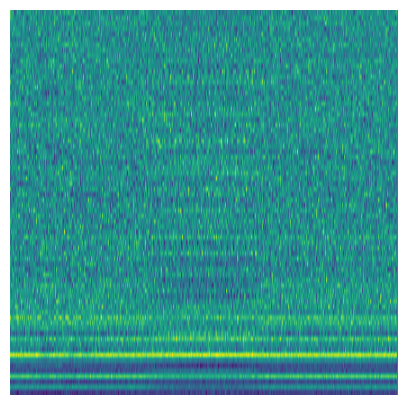

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5, 5))
plt.imshow(latents.squeeze().detach().cpu().numpy(), aspect='auto', origin='lower')
plt.axis('off')

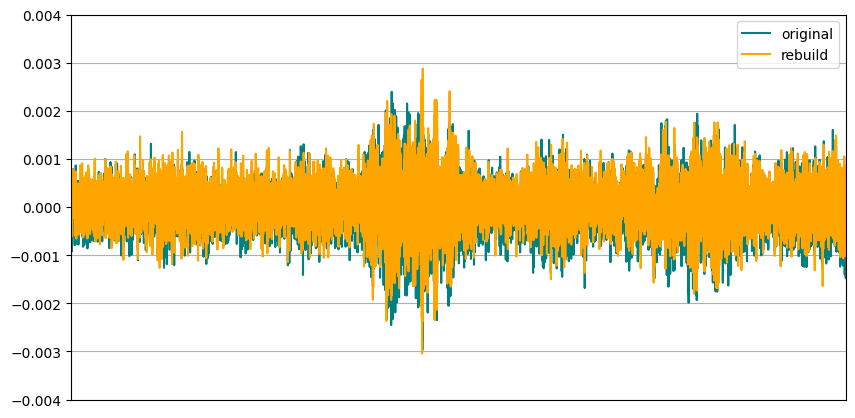

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(signal.audio_data.squeeze(), label='original',color='teal')
plt.plot(rebuild_dac.squeeze().detach(), label='rebuild',color='orange')
plt.xlim(0, 44000)
plt.ylim(-.004, .004)
plt.xticks([])
plt.grid()
plt.legend()

In [ ]:
import IPython
import IPython.display
IPython.display.Audio(data=signal.audio_data.squeeze(), rate=44000)

In [ ]:
import IPython
import IPython.display
IPython.display.Audio(data=rebuild_dac.squeeze().detach(), rate=44000)

# Get BirdNet Embeddings

In [67]:
import tensorflow as tf
tf.config.list_physical_devices("GPU")

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [68]:
from birdset.datamodule.birdset_datamodule import BirdSetDataModule
from birdset.configs.datamodule_configs import DatasetConfig
import datasets

dataset = datasets.load_from_disk("/mnt/stud/work/rantjuschin/datasets/indexed/HSN")

dataset

DatasetDict({
    train: Dataset({
        features: ['filepath', 'start_time', 'end_time', 'low_freq', 'high_freq', 'ebird_code', 'ebird_code_multilabel', 'ebird_code_secondary', 'call_type', 'sex', 'lat', 'long', 'length', 'microphone', 'license', 'source', 'local_time', 'detected_events', 'event_cluster', 'peaks', 'quality', 'recordist', 'genus', 'species_group', 'order', 'genus_multilabel', 'species_group_multilabel', 'order_multilabel', 'index'],
        num_rows: 38170
    })
    test: Dataset({
        features: ['filepath', 'start_time', 'end_time', 'low_freq', 'high_freq', 'ebird_code', 'ebird_code_multilabel', 'ebird_code_secondary', 'call_type', 'sex', 'lat', 'long', 'length', 'microphone', 'license', 'source', 'local_time', 'detected_events', 'event_cluster', 'peaks', 'quality', 'recordist', 'genus', 'species_group', 'order', 'genus_multilabel', 'species_group_multilabel', 'order_multilabel', 'index'],
        num_rows: 10296
    })
    test_5s: Dataset({
        features: 

In [70]:
from birdnet.models import ModelV2M4

model = ModelV2M4()

ModuleNotFoundError: No module named 'birdnet'

In [ ]:
from birdset.modules.models.birdnet import BirdNetModel

birdnet = BirdNetModel(
    num_classes=21,
    
)

# ConvNeXT testing

In [2]:
from birdset.datamodule.components.event_mapping import XCEventMapping
from datasets import load_dataset, Audio
from util.event_extraction import load_audio


ds = load_dataset("DBD-research-group/BirdSet", "HSN", cache_dir="/home/rantjuschin/data_birdset/HSN", num_proc=4)

ds["train"] = ds["train"].cast_column(
    column="audio",
    feature=Audio(
        sampling_rate=32_000,
        mono=True,
        decode=False,
    ),
)
mapper = XCEventMapping()

ds["train"] = ds["train"].map(
    mapper,
    remove_columns=["audio"],
    batched=True,
    batch_size=300,
    num_proc=3,
    desc="Train event mapping"
)

print(ds)
print(ds["train"][0])

/home/rantjuschin/miniconda3/envs/torch-tf/lib/python3.10/site-packages/huggingface_hub/file_download.py:797: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/home/rantjuschin/miniconda3/envs/torch-tf/lib/python3.10/site-packages/torch_audiomentations/utils/io.py:27: UserWarning: torchaudio._backend.set_audio_backend has been deprecated. With dispatcher enabled, this function is no-op. You can remove the function call.
  torchaudio.set_audio_backend("soundfile")
/home/rantjuschin/miniconda3/envs/torch-tf/lib/python3.10/site-packages/datasets/load.py:1461: FutureWarning: The repository for DBD-research-group/BirdSet contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/DBD-research-group/BirdSet
You can avoid this message in future by passing the a

DatasetDict({
    train: Dataset({
        features: ['audio', 'filepath', 'start_time', 'end_time', 'low_freq', 'high_freq', 'ebird_code', 'ebird_code_multilabel', 'ebird_code_secondary', 'call_type', 'sex', 'lat', 'long', 'length', 'microphone', 'license', 'source', 'local_time', 'detected_events', 'event_cluster', 'peaks', 'quality', 'recordist', 'genus', 'species_group', 'order', 'genus_multilabel', 'species_group_multilabel', 'order_multilabel'],
        num_rows: 38170
    })
    test: Dataset({
        features: ['audio', 'filepath', 'start_time', 'end_time', 'low_freq', 'high_freq', 'ebird_code', 'ebird_code_multilabel', 'ebird_code_secondary', 'call_type', 'sex', 'lat', 'long', 'length', 'microphone', 'license', 'source', 'local_time', 'detected_events', 'event_cluster', 'peaks', 'quality', 'recordist', 'genus', 'species_group', 'order', 'genus_multilabel', 'species_group_multilabel', 'order_multilabel'],
        num_rows: 10296
    })
    test_5s: Dataset({
        features: 

 ## Load Model

In [28]:
from transformers import ConvNextForImageClassification
import torch.nn as nn

class Identity(nn.Module):
    def __init__(self):
        super(Identity, self).__init__()

    def forward(self, input):
        return input

model = ConvNextForImageClassification.from_pretrained(
            "DBD-research-group/ConvNeXT-Base-BirdSet-XCL",
            num_labels=21,
            num_channels=1,
            ignore_mismatched_sizes=True,
        )

model.classifier = Identity()
print(model)

/mnt/stud/home/rantjuschin/miniconda3/envs/torch-tf/lib/python3.10/site-packages/huggingface_hub/file_download.py:797: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Some weights of ConvNextForImageClassification were not initialized from the model checkpoint at DBD-research-group/ConvNeXT-Base-BirdSet-XCL and are newly initialized because the shapes did not match:
- classifier.bias: found shape torch.Size([9736]) in the checkpoint and torch.Size([21]) in the model instantiated
- classifier.weight: found shape torch.Size([9736, 1024]) in the checkpoint and torch.Size([21, 1024]) in the model instantiated
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


ConvNextForImageClassification(
  (convnext): ConvNextModel(
    (embeddings): ConvNextEmbeddings(
      (patch_embeddings): Conv2d(1, 128, kernel_size=(4, 4), stride=(4, 4))
      (layernorm): ConvNextLayerNorm()
    )
    (encoder): ConvNextEncoder(
      (stages): ModuleList(
        (0): ConvNextStage(
          (downsampling_layer): Identity()
          (layers): Sequential(
            (0): ConvNextLayer(
              (dwconv): Conv2d(128, 128, kernel_size=(7, 7), stride=(1, 1), padding=(3, 3), groups=128)
              (layernorm): ConvNextLayerNorm()
              (pwconv1): Linear(in_features=128, out_features=512, bias=True)
              (act): GELUActivation()
              (pwconv2): Linear(in_features=512, out_features=128, bias=True)
              (drop_path): Identity()
            )
            (1): ConvNextLayer(
              (dwconv): Conv2d(128, 128, kernel_size=(7, 7), stride=(1, 1), padding=(3, 3), groups=128)
              (layernorm): ConvNextLayerNorm()
     

## Use Custom decoding

In [32]:
from birdset.datamodule.components.transforms import BirdSetTransformsWrapper
from birdset.datamodule.components.resize import Resizer
from birdset.datamodule.components.augmentations import PowerToDB
from birdset.datamodule.components.transforms import PreprocessingConfig
from torchaudio.transforms import Spectrogram, MelScale
import torch

transfromer = BirdSetTransformsWrapper(
        model_type="vision",
        sampling_rate=32000,
        max_length=5,
        preprocessing=PreprocessingConfig(
            spectrogram_conversion= Spectrogram(
                n_fft=1024,
                hop_length=320,
                power=2.0,
            ),
            resizer=Resizer(
                db_scale=True,
                target_height=None,
                target_width=None,
            ),
            melscale_conversion=MelScale(n_mels=128, sample_rate=32000, n_stft=513),
            dbscale_conversion=PowerToDB(),
            normalize_spectrogram=True,
            normalize_waveform=None,
            mean=-4.268,
            std=4.569,
            #mean: -15.854 # Mean of XCM: -15.854 ; Mean of XCL: -19.107
            #std: 12.911 # Standard deviation of XCM: 12.911 ; Standard deviation of XCL: 13.098
        )
    )
audio, _ = load_audio(dataset["train"][0], 5, 5, 32000, pad_to_min_length=True)

test = transfromer._preprocess(torch.from_numpy(audio).unsqueeze(0).unsqueeze(0), None)
print(test.shape, test)

torch.Size([1, 1, 128, 501]) tensor([[[[-11.7005, -11.7005,  -6.8590,  ..., -11.3583,  -9.4224,  -7.5442],
          [-11.7005, -11.0526,  -5.6888,  ..., -10.1881,  -8.2523,  -6.3740],
          [-11.7005, -11.7005,  -5.7027,  ...,  -9.0258,  -9.8483,  -7.0570],
          ...,
          [-11.7005, -11.7005, -11.7005,  ..., -11.7005, -11.7005, -11.7005],
          [-11.7005, -11.7005, -11.7005,  ..., -11.7005, -11.7005, -11.7005],
          [-11.7005, -11.7005, -11.7005,  ..., -11.7005, -11.7005, -11.7005]]]])


(-0.5, 500.5, -0.5, 127.5)

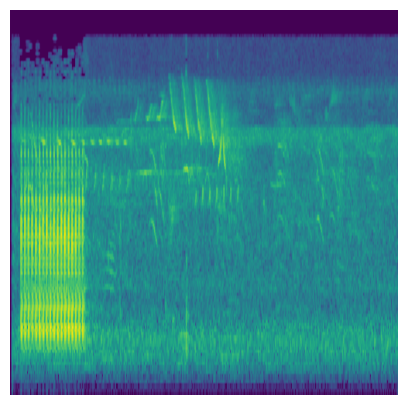

In [33]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5, 5))
plt.imshow(test.squeeze().detach().cpu().numpy(), aspect='auto', origin='lower')
plt.axis('off')

In [21]:
tmp = test
print(tmp.shape)
output = model.forward(tmp)
output

torch.Size([1, 1, 128, 501])


ImageClassifierOutputWithNoAttention(loss=None, logits=tensor([[-0.7473, -0.6117, -0.1832,  ..., -0.8460,  0.4431, -0.9818]],
       grad_fn=<NativeLayerNormBackward0>), hidden_states=None)

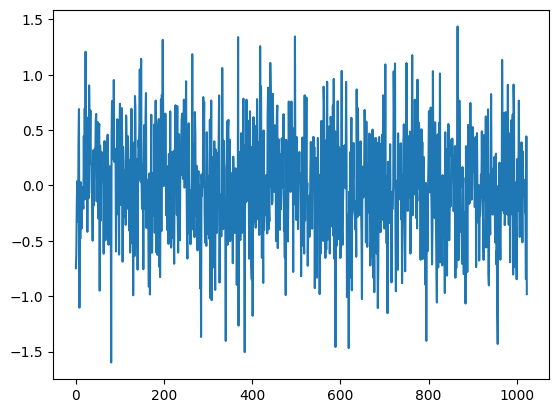

In [24]:
logits = output.logits.squeeze().detach()
plt.plot(logits)

## Use BirdSet decoding

In [42]:
from birdset.datamodule.components.transforms import BirdSetTransformsWrapper
from birdset.datamodule.components.resize import Resizer
from birdset.datamodule.components.augmentations import PowerToDB
from birdset.datamodule.components.transforms import PreprocessingConfig
from birdset.datamodule.components.event_decoding import EventDecoding
from birdset.datamodule.components.feature_extraction import DefaultFeatureExtractor
from torchaudio.transforms import Spectrogram, MelScale
import torch

decoder = EventDecoding(
    min_len=0,
    max_len=5,
    sampling_rate=32000,
    extension_time=5,
    extracted_interval=5
)

extractor = DefaultFeatureExtractor(
    feature_size=1,
    sampling_rate=32000,
    padding_value=0,
    return_attention_mask=False
)

transfromer = BirdSetTransformsWrapper(
        model_type="vision",
        sampling_rate=32000,
        max_length=5,
        preprocessing=PreprocessingConfig(
            spectrogram_conversion= Spectrogram(
                n_fft=1024,
                hop_length=320,
                power=2.0,
            ),
            resizer=Resizer(
                db_scale=True,
                target_height=None,
                target_width=None,
            ),
            melscale_conversion=MelScale(n_mels=128, sample_rate=32000, n_stft=513),
            dbscale_conversion=PowerToDB(),
            normalize_spectrogram=True,
            normalize_waveform=None,
            mean=-4.268,
            std=4.569,
            #mean: -15.854 # Mean of XCM: -15.854 ; Mean of XCL: -19.107
            #std: 12.911 # Standard deviation of XCM: 12.911 ; Standard deviation of XCL: 13.098
        )
    )

batch = {}
train_set = dataset["train"]
for key in train_set[0].keys():
    batch[key] = [train_set[0][key]]

for key in train_set[1].keys():
    batch[key].append(train_set[1][key])

decoded_batch = decoder(batch)
decoded_batch["audio"] = [audio_attribute["array"] for audio_attribute in decoded_batch["audio"]]
sample = extractor(decoded_batch["audio"], padding="max_length", max_length=5*32000, truncation=True, return_attention_mask=False)
print(sample["input_values"], sample["input_values"].shape)

test = transfromer._preprocess(sample["input_values"].unsqueeze(1), None)
print(test.shape, test)

tensor([[ 1.1900e-06, -1.7668e-08,  3.2047e-06,  ...,  1.0900e-03,
          3.6186e-04, -2.3215e-04],
        [-5.9748e-03,  1.0132e-03,  3.2078e-03,  ..., -6.6383e-03,
          2.3550e-03,  1.1790e-02]]) torch.Size([2, 160000])
torch.Size([2, 1, 128, 501]) tensor([[[[-11.7005, -11.7005,  -6.8590,  ..., -11.3583,  -9.4224,  -7.5442],
          [-11.7005, -11.0526,  -5.6888,  ..., -10.1881,  -8.2523,  -6.3740],
          [-11.7005, -11.7005,  -5.7027,  ...,  -9.0258,  -9.8483,  -7.0570],
          ...,
          [-11.7005, -11.7005, -11.7005,  ..., -11.7005, -11.7005, -11.7005],
          [-11.7005, -11.7005, -11.7005,  ..., -11.7005, -11.7005, -11.7005],
          [-11.7005, -11.7005, -11.7005,  ..., -11.7005, -11.7005, -11.7005]]],


        [[[ -5.7284,  -7.7160, -11.1487,  ..., -11.7005,  -6.6347,  -4.5400],
          [ -4.5582,  -6.5459,  -9.9785,  ..., -10.5750,  -5.4646,  -3.3699],
          [ -4.0177,  -6.7274,  -7.8415,  ..., -10.1223,  -5.7316,  -3.7800],
          ...,
    

(-0.5, 500.5, -0.5, 127.5)

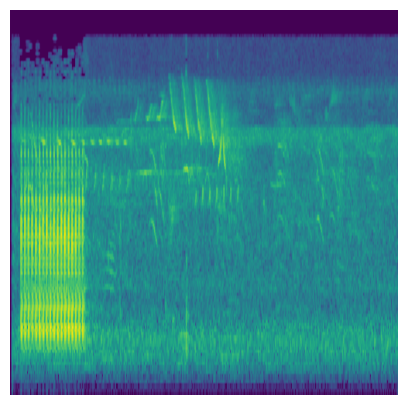

In [44]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5, 5))
plt.imshow(test[0].squeeze().detach().cpu().numpy(), aspect='auto', origin='lower')
plt.axis('off')

In [45]:
output = model.forward(test)
output

ImageClassifierOutputWithNoAttention(loss=None, logits=tensor([[ 0.5070, -0.7127, -0.0705,  ..., -0.2163, -0.1139,  0.4070],
        [ 0.8874, -0.4942, -0.4744,  ..., -0.0791,  0.0766, -0.4292]],
       grad_fn=<NativeLayerNormBackward0>), hidden_states=None)

In [46]:
logits = output.logits.squeeze().detach()
print(logits, logits.shape)
#plt.scatter(np.arange(len(logits)), logits)

tensor([[ 0.5070, -0.7127, -0.0705,  ..., -0.2163, -0.1139,  0.4070],
        [ 0.8874, -0.4942, -0.4744,  ..., -0.0791,  0.0766, -0.4292]]) torch.Size([2, 1024])


In [49]:
for idx in range(logits.shape[0]):
    print(logits[idx], logits[idx].shape)

tensor([ 0.5070, -0.7127, -0.0705,  ..., -0.2163, -0.1139,  0.4070]) torch.Size([1024])
tensor([ 0.8874, -0.4942, -0.4744,  ..., -0.0791,  0.0766, -0.4292]) torch.Size([1024])


In [65]:
model = model.to("cuda")

In [66]:
def get_embeddings(batch):
    decoded_batch = decoder(batch)
    decoded_batch["audio"] = [audio_attribute["array"] for audio_attribute in decoded_batch["audio"]]
    samples = extractor(decoded_batch["audio"], padding="max_length", max_length=5*32000, truncation=True, return_attention_mask=False)
    samples = samples["input_values"].unsqueeze(1)
    spectogram = transfromer._preprocess(samples, None).to("cuda")
    output = model.forward(spectogram)
    embeddings = output.logits.squeeze().detach()
    for idx in range(embeddings.shape[0]):
        decoded_batch["audio"][idx] = embeddings[idx]
    return decoded_batch

embeddings_set = dataset.map(get_embeddings, remove_columns=["filepath"], batched=True, batch_size=32)

Map:   0%|          | 0/38170 [00:00<?, ? examples/s]

Map:   0%|          | 0/10296 [00:00<?, ? examples/s]

Map:   0%|          | 0/12000 [00:00<?, ? examples/s]

# Testing


In [1]:
from datasets import load_from_disk

dataset = load_from_disk("../datasets/indexed/HSN")
dataset

DatasetDict({
    train: Dataset({
        features: ['filepath', 'start_time', 'end_time', 'low_freq', 'high_freq', 'ebird_code', 'ebird_code_multilabel', 'ebird_code_secondary', 'call_type', 'sex', 'lat', 'long', 'length', 'microphone', 'license', 'source', 'local_time', 'detected_events', 'event_cluster', 'peaks', 'quality', 'recordist', 'genus', 'species_group', 'order', 'genus_multilabel', 'species_group_multilabel', 'order_multilabel', 'index'],
        num_rows: 38170
    })
    test: Dataset({
        features: ['filepath', 'start_time', 'end_time', 'low_freq', 'high_freq', 'ebird_code', 'ebird_code_multilabel', 'ebird_code_secondary', 'call_type', 'sex', 'lat', 'long', 'length', 'microphone', 'license', 'source', 'local_time', 'detected_events', 'event_cluster', 'peaks', 'quality', 'recordist', 'genus', 'species_group', 'order', 'genus_multilabel', 'species_group_multilabel', 'order_multilabel', 'index'],
        num_rows: 10296
    })
    test_5s: Dataset({
        features: 

In [3]:
print(dataset["train"][0], dataset["train"][1])
print(dataset["test"][0], dataset["test"][1])
print(dataset["test_5s"][0], dataset["test_5s"][1])

{'filepath': '/home/rantjuschin/data_birdset/HSN/downloads/extracted/70fda45ec1af208cea5e5c58da3884bb439e0ca32f029bb39d42cfd4bde384bc/XC805337.ogg', 'start_time': None, 'end_time': None, 'low_freq': None, 'high_freq': None, 'ebird_code': 11, 'ebird_code_multilabel': [11], 'ebird_code_secondary': ['yellow2'], 'call_type': 'uncertain', 'sex': 'female, male', 'lat': 50.0927, 'long': 18.9176, 'length': 29, 'microphone': 'focal', 'license': '//creativecommons.org/licenses/by-nc-sa/4.0/', 'source': 'xenocanto', 'local_time': '19:30', 'detected_events': [12.528, 13.632], 'event_cluster': [0], 'peaks': [12.678638560998488, 18.969645289822907, 21.799898317045177], 'quality': 'A', 'recordist': 'Ireneusz Oleksik', 'genus': 1, 'species_group': 10, 'order': 0, 'genus_multilabel': None, 'species_group_multilabel': None, 'order_multilabel': None, 'index': 0} {'filepath': '/home/rantjuschin/data_birdset/HSN/downloads/extracted/70fda45ec1af208cea5e5c58da3884bb439e0ca32f029bb39d42cfd4bde384bc/XC805337.o

In [1]:
import torch
torch.cuda.is_available()

True